In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [32]:
df = web.DataReader('PEKGY.IS',data_source='yahoo',start='2018-01-01',end='2020-12-29')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-21,0.675891,0.645061,0.652175,0.648618,44548662.0,0.648618
2018-02-22,0.648618,0.626088,0.648618,0.629646,7702580.0,0.629646
2018-02-23,0.655733,0.616602,0.633203,0.654547,10602694.0,0.654547
2018-02-26,0.659290,0.648618,0.655733,0.658104,5583449.0,0.658104
2018-02-27,0.659290,0.652175,0.659290,0.652175,2252714.0,0.652175
...,...,...,...,...,...,...
2020-12-22,2.870000,2.730000,2.740000,2.820000,87741236.0,2.820000
2020-12-23,3.100000,3.100000,3.100000,3.100000,14964219.0,3.100000
2020-12-24,3.270000,2.810000,3.090000,2.830000,271350974.0,2.830000


In [34]:
df.shape

(732, 6)

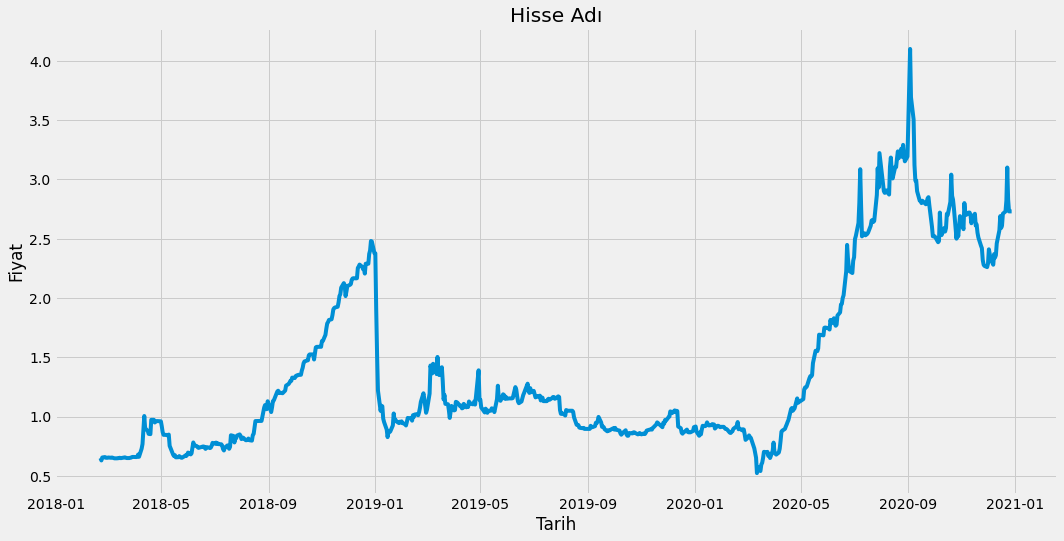

In [36]:
plt.figure(figsize=(16,8))
plt.title('Hisse Adı')
plt.plot(df['Close'])
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.show()


In [37]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* 0.8)
training_data_len

586

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03512728],
       [0.02982339],
       [0.03678481],
       [0.03777923],
       [0.0361217 ],
       [0.0361217 ],
       [0.0361217 ],
       [0.03678481],
       [0.0361217 ],
       [0.03678481],
       [0.0361217 ],
       [0.03545885],
       [0.03479573],
       [0.03479573],
       [0.03545885],
       [0.03512728],
       [0.0361217 ],
       [0.03512728],
       [0.03645326],
       [0.03678481],
       [0.03711638],
       [0.0361217 ],
       [0.03545885],
       [0.03545885],
       [0.0361217 ],
       [0.03645326],
       [0.03777923],
       [0.0381108 ],
       [0.03777923],
       [0.03777923],
       [0.03877365],
       [0.04374626],
       [0.03844237],
       [0.05766942],
       [0.06860877],
       [0.10043272],
       [0.13457731],
       [0.1057369 ],
       [0.0994383 ],
       [0.09247688],
       [0.09214531],
       [0.09181374],
       [0.1256268 ],
       [0.1256268 ],
       [0.11932849],
       [0.12264328],
       [0.12231199],
       [0.122

In [39]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.03512728, 0.02982339, 0.03678481, 0.03777923, 0.0361217 ,
       0.0361217 , 0.0361217 , 0.03678481, 0.0361217 , 0.03678481,
       0.0361217 , 0.03545885, 0.03479573, 0.03479573, 0.03545885,
       0.03512728, 0.0361217 , 0.03512728, 0.03645326, 0.03678481,
       0.03711638, 0.0361217 , 0.03545885, 0.03545885, 0.0361217 ,
       0.03645326, 0.03777923, 0.0381108 , 0.03777923, 0.03777923,
       0.03877365, 0.04374626, 0.03844237, 0.05766942, 0.06860877,
       0.10043272, 0.13457731, 0.1057369 , 0.0994383 , 0.09247688,
       0.09214531, 0.09181374, 0.1256268 , 0.1256268 , 0.11932849,
       0.12264328, 0.12231199, 0.12264328, 0.12198043, 0.12198043,
       0.11037794, 0.09678635, 0.0901562 , 0.0901562 , 0.08916179,
       0.08982492, 0.09081932, 0.06429928, 0.0483873 , 0.04341469])]
[0.04009990341092812]



In [40]:
x_train,y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(526, 60, 1)

In [41]:
model = Sequential()
model.add(LSTM ( 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM ( 50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [42]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

526/526 [==============================] - 18s 28ms/step - loss: 0.0035


In [44]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [45]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [46]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.03406943768671114

<ipython-input-54-3955e47f842a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


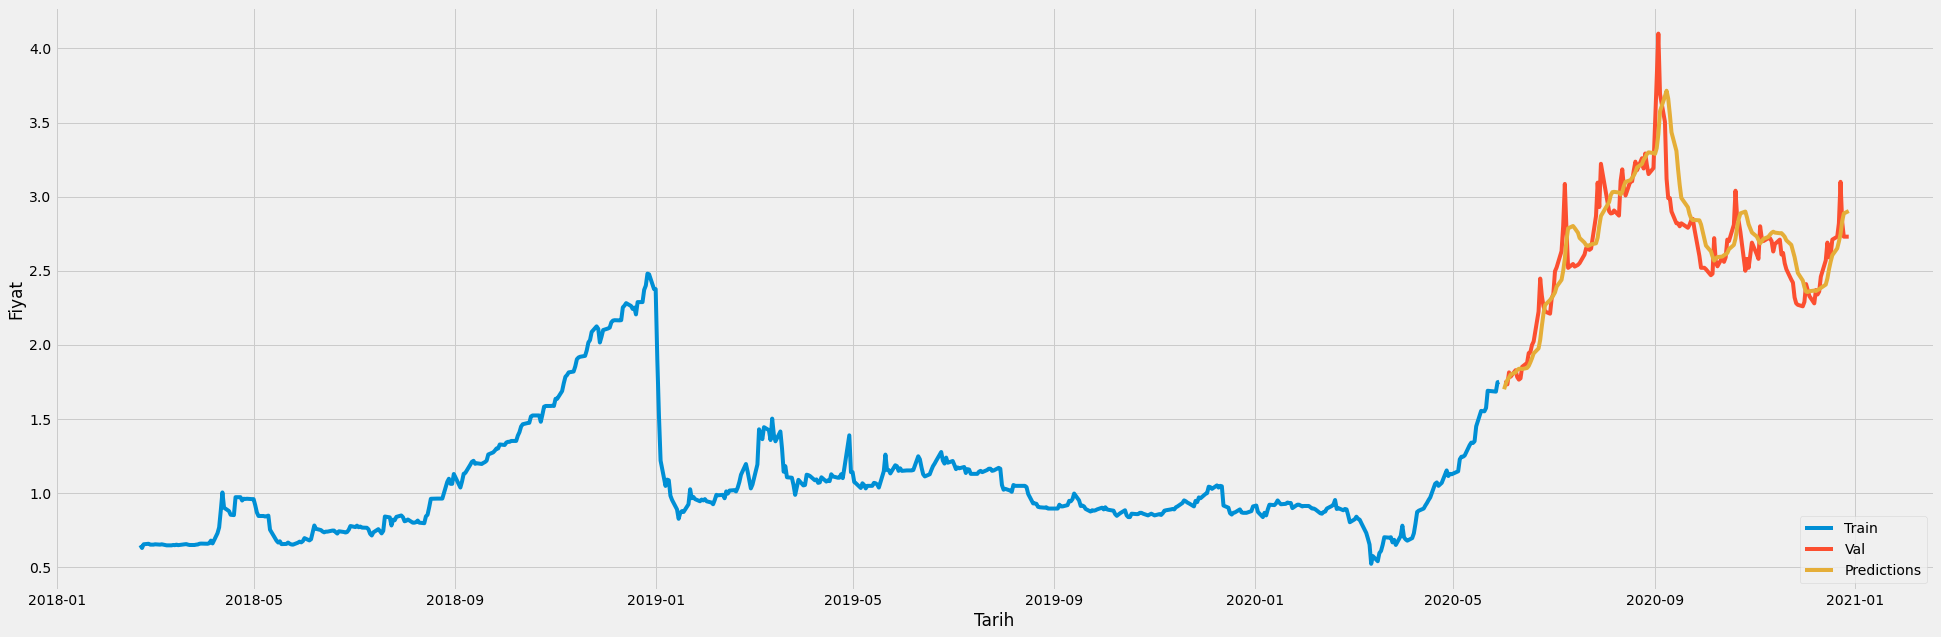

In [54]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(30,10))
plt.plot(train['Close'])
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train' , 'Val' , 'Predictions'],loc='lower right')
plt.show()

In [50]:
valid

,Close,Predictions
Date,,
2020-06-01,1.74515,1.700317
2020-06-02,1.74515,1.736459
2020-06-03,1.73360,1.763072
2020-06-04,1.81450,1.779664
2020-06-05,1.78560,1.799672
...,...,...
2020-12-22,2.82000,2.696146
2020-12-23,3.10000,2.746964
2020-12-24,2.83000,2.833643


In [55]:
stock_quato = web.DataReader('PEKGY.IS',data_source='yahoo',start='2019-01-01',end='2020-12-29')
new_df = stock_quato.filter(['Close'])
last_60 = new_df[-60:].values
last_60_scaled = scaler.transform(last_60)
X_test= []
X_test.append(last_60_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[2.882878]]


In [58]:
last_60

array([[2.48000002],
       [2.72000003],
       [2.55999994],
       [2.52999997],
       [2.58999991],
       [2.55999994],
       [2.58999991],
       [2.71000004],
       [2.70000005],
       [2.80999994],
       [3.03999996],
       [2.8599999 ],
       [2.82999992],
       [2.75999999],
       [2.5       ],
       [2.57999992],
       [2.51999998],
       [2.69000006],
       [2.6099999 ],
       [2.57999992],
       [2.79999995],
       [2.72000003],
       [2.70000005],
       [2.72000003],
       [2.72000003],
       [2.70000005],
       [2.63000011],
       [2.68000007],
       [2.71000004],
       [2.6099999 ],
       [2.61999989],
       [2.54999995],
       [2.50999999],
       [2.44000006],
       [2.42000008],
       [2.31999993],
       [2.27999997],
       [2.26999998],
       [2.25999999],
       [2.28999996],
       [2.41000009],
       [2.36999989],
       [2.32999992],
       [2.27999997],
       [2.36999989],
       [2.33999991],
       [2.3599999 ],
       [2.460